In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

def get_df(i):  # 第幾次作業的df(刪除第一次ac後的資料)
  # Step1. 讀入資料&加入欄位
  raw_data = pd.read_csv('C:/Users/Vincent/Desktop/PWS Homework/PWS Homework {}.csv'.format(i), header=None, parse_dates = [0])
  raw_data.columns = ['When', 'ID', 'Status', 'Problem', 'Time', 'Memory', 'Language', 'Author', 'HW']
  raw_data.sort_values("When", ascending=True, inplace=True)
  raw_data['Problem'] = raw_data['Problem'].astype(str)
  raw_data['Problem Code'] = 'HW' + raw_data['HW'].str.get(-1) + '-' + raw_data['Problem'].str.get(-1)
  # Step2. 刪去AC後的Submission
  data_list = raw_data.values.tolist()
  ac_list = []
  df_list = []
  for data in data_list:
    if [data[9], data[7]] not in ac_list:  # 這題還沒AC過
      df_list.append(data)
      if data[2] == "Accepted":  # 代表這題AC過了，之後的繳交資料都會刪掉
        ac_list.append([data[9], data[7]])
  # Step3. 將List轉成pandas dataframe
  df = pd.DataFrame.from_dict(df_list)
  df.columns = ['When', 'ID', 'Status', 'Problem', 'Time', 'Memory', 'Language', 'Author', 'HW', 'Problem Code']
  df = df[~df['Author'].isin(['b06302345@ntu.edu.tw', 'hyusterr', 'jeffery12697', 'yeutong00'])]
  df.set_index('ID', inplace=True)
  return df

def get_ac_df(df):
  ac_df = df[df['Status'] == "Accepted"]
  return ac_df

def get_first_df(df):
  first_df = df.drop_duplicates(subset=['Problem Code', 'Author'])
  return first_df

def get_whole_data(target_dfs):  # 得到哪種資料、幾次作業
  return pd.concat([target_dfs[i] for i in range(1, 7)], ignore_index=False)

In [2]:
dfs = [None]  # 1~6分別裝每次作業的df
ac_dfs = [None]  # 1~6分別裝每次作業的ac_df
first_dfs = [None]  # 1~6分別裝每次作業的first_df
for i in range(1, 7):  # 讀入資料
  hw_i = get_df(i)
  dfs.append(hw_i)
  ac_dfs.append(get_ac_df(hw_i))
  first_dfs.append(get_first_df(hw_i))

df = get_whole_data(dfs)
ac_df = get_whole_data(ac_dfs)
first_df = get_whole_data(first_dfs)

# Insights

In [3]:
first_dfs[1]

,When,Status,Problem,Time,Memory,Language,Author,HW,Problem Code
ID,,,,,,,,,
4c277d478631,2021-02-24 13:34:58,Wrong Answer,101,23ms,8MB,Python3,b06502168,PWS Homework 1,HW1-1
126e5dc88c94,2021-02-24 13:46:53,Accepted,101,21ms,8MB,Python3,b07705031,PWS Homework 1,HW1-1
f0ea2cf9c697,2021-02-24 13:48:40,Compile Error,101,--,--,Python3,b06702026,PWS Homework 1,HW1-1
f0154002c19f,2021-02-24 13:57:18,Accepted,101,21ms,8MB,Python3,b08106009,PWS Homework 1,HW1-1
666784d13d55,2021-02-24 13:58:32,Accepted,102,22ms,8MB,Python3,b07705031,PWS Homework 1,HW1-2
...,...,...,...,...,...,...,...,...,...
18c86c6447ec,2021-03-22 01:52:48,Accepted,105,23ms,8MB,Python3,b08207013,PWS Homework 1,HW1-5
fede26f5ee02,2021-03-22 02:10:43,Partial Accepted,103,26ms,8MB,Python3,b07704059,PWS Homework 1,HW1-3
b1087135e1fa,2021-03-22 03:07:02,Partial Accepted,103,29ms,8MB,Python3,b08207013,PWS Homework 1,HW1-3


In [4]:
author_list = first_dfs[1]['Author'].unique().tolist()
author_dict = {}
for n in range(len(author_list)):
  author_dict[author_list[n]] = [n + 1, 0]
author_ac = {}

for author in ac_dfs[1]['Author']:
  author_dict[author][1] += 1
pd.DataFrame(author_dict).T

,0,1
b06502168,1,5
b07705031,2,5
b06702026,3,5
b08106009,4,5
b05602046,5,5
...,...,...
b08403006,76,5
b07501013,77,5
b07104024,78,5
b06302238,79,0


# 1. get_status()

In [27]:
def get_status():
  HW_Status = pd.crosstab(df['Status'], df['HW']).reset_index()
  Problem_Status = pd.crosstab(df['Status'], df['Problem Code']).reset_index()
  Status_df = HW_Status.merge(Problem_Status, on='Status')
  Status_df.set_index('Status', inplace=True)
  Status_df.index.name = None
  return Status_df.T
get_status()

,Accepted,Compile Error,Partial Accepted,Pending,Runtime Error,Time Limit Exceeded,Wrong Answer
PWS Homework 1,336,146,1515,3,152,0,437
PWS Homework 2,367,3,123,0,14,1,122
PWS Homework 3,280,68,1025,0,95,0,114
PWS Homework 4,166,58,1059,0,226,10,168
PWS Homework 5,215,54,1002,0,93,34,92
PWS Homework 6,107,157,564,0,455,24,280
HW1-1,71,62,307,3,46,0,151
HW1-2,74,38,229,0,20,0,88
HW1-3,63,19,329,0,56,0,88
HW1-4,59,22,467,0,18,0,92


# 2. get_time_data()

In [7]:
def get_time_data(df, time='hour'):
  # get_time_data(df)  # 總作業得到幾點的資料
  # get_time_data(dfs[1], 'date')  # 第一次作業幾月幾號的資料
  if time == 'hour':
    df = pd.crosstab(df['When'].dt.hour, df['Status'])
  elif time == 'date':
    df = pd.crosstab(df['When'].dt.date, df['Status'])
  df['Submission'] = df.sum(axis=1)
  df['Wrong Answer'] = df['Submission'] - df['Accepted']
  df['AC Rate'] = df['Accepted'] / (df['Wrong Answer'] + df['Accepted'])
  df = df.loc[:,['Accepted', 'Wrong Answer', 'Submission', 'AC Rate']]
  df.reset_index(inplace=True)
  return df

In [13]:
get_time_data(df)

Status,When,Accepted,Wrong Answer,Submission,AC Rate
0,0,104,580,684,0.15
1,1,78,556,634,0.12
2,2,47,423,470,0.10
3,3,15,118,133,0.11
4,4,13,68,81,0.16
5,5,4,22,26,0.15
6,6,6,42,48,0.12
7,7,3,14,17,0.18
8,8,13,48,61,0.21
9,9,45,157,202,0.22


# 3. get_date_data()

In [14]:
def get_date_data():
  date_data_list = [None]
  for n in range(1, 7):
    date_data_list.append(get_time_data(dfs[n], 'date'))
  date_merge = date_data_list[1].merge(date_data_list[2], on='When', suffixes=('_HW1','_HW2'), how='outer')
  date_merge = date_merge.merge(date_data_list[3], on='When', how='outer')
  date_merge = date_merge.merge(date_data_list[4], on='When', suffixes=('_HW3','_HW4'), how='outer')
  date_merge = date_merge.merge(date_data_list[5], on='When', how='outer')
  date_merge = date_merge.merge(date_data_list[6], on='When', suffixes=('_HW5','_HW6'), how='outer')
  date_merge = date_merge.fillna(-1)
  return date_merge

In [15]:
get_date_data()

Status,When,Accepted_HW1,Wrong Answer_HW1,Submission_HW1,AC Rate_HW1,Accepted_HW2,Wrong Answer_HW2,Submission_HW2,AC Rate_HW2,Accepted_HW3,...,Submission_HW4,AC Rate_HW4,Accepted_HW5,Wrong Answer_HW5,Submission_HW5,AC Rate_HW5,Accepted_HW6,Wrong Answer_HW6,Submission_HW6,AC Rate_HW6
0,2021-02-24,27.00,199.00,226.00,0.12,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
1,2021-02-25,12.00,88.00,100.00,0.12,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2,2021-02-26,25.00,71.00,96.00,0.26,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
3,2021-02-27,10.00,89.00,99.00,0.10,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
4,2021-02-28,14.00,89.00,103.00,0.14,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-05-20,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,7.00,40.00,47.00,0.15
86,2021-05-21,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,5.00,78.00,83.00,0.06
87,2021-05-22,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,15.00,207.00,222.00,0.07
88,2021-05-23,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,9.00,262.00,271.00,0.03


# 4. get_ac_num()

In [16]:
def get_ac_num():
  ac_date = [None]
  for i in range(1, 7):
    ac_date.append(pd.crosstab(ac_dfs[i]['When'].dt.date, ac_dfs[i]['Problem Code']).cumsum())
  date_merge = ac_date[1].merge(ac_date[2], on='When', how='outer')
  for a in range(3, 7):
    date_merge = date_merge.merge(ac_date[a], on='When', how='outer')
  date_merge = date_merge.fillna(-1)
  date_merge.iloc[35, 5:10] = date_merge.iloc[33, 5:10]
  return date_merge.sort_values('When').reset_index()

In [17]:
get_ac_num()

Problem Code,When,HW1-1,HW1-2,HW1-3,HW1-4,HW1-5,HW2-1,HW2-2,HW2-3,HW2-4,...,HW5-1,HW5-2,HW5-3,HW5-4,HW5-5,HW6-1,HW6-2,HW6-3,HW6-4,HW6-5
0,2021-02-24,9.00,8.00,4.00,4.00,2.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
1,2021-02-25,12.00,12.00,5.00,6.00,4.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2,2021-02-26,17.00,20.00,10.00,9.00,8.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
3,2021-02-27,19.00,21.00,12.00,11.00,11.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
4,2021-02-28,22.00,24.00,14.00,13.00,15.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-05-20,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,7.00,28.00,13.00,6.00,19.00
86,2021-05-21,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,7.00,30.00,15.00,6.00,20.00
87,2021-05-22,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,8.00,33.00,21.00,9.00,22.00
88,2021-05-23,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,8.00,35.00,23.00,10.00,26.00


# Viualization

In [18]:
import matplotlib.pyplot as plt

def crosstab_HW(df):
  crosstab_Problem = pd.crosstab(df['HW'], df['Status'])
  fig = crosstab_Problem.plot(kind='barh', stacked=True, figsize=(8,5))
  plt.xticks(rotation=0)
  plt.ylabel('Submissiom Times')
  return fig

def crosstab_Problem(df):
  crosstab_Problem = pd.crosstab(df['Problem Code'], df['Status'])
  fig = crosstab_Problem.plot(kind='bar', stacked=True, figsize=(8,5))
  plt.xticks(rotation=0)
  plt.ylabel('Submissiom Times')
  return fig

def get_time_lineplot(df, time='hour'):
  df = get_time_data(df, time)
  fig, ax = plt.subplots(figsize=(15, 4))
  ax.bar(df['When'], df['Accepted'], color='springgreen', label='Accepted')
  ax.bar(df['When'], df['Wrong Answer'], bottom=df['Accepted'], color='salmon', label='Wrong Answer')
  ax.set_ylabel('Submission')
  ax2 = ax.twinx()
  ax2.plot(df['When'], df['AC Rate'], color='black')
  ax2.set_ylabel('AC Rate')
  ax.legend()
  if time == 'hour':
    plt.xticks(np.arange(0,24,1))
    ax.set_xlabel('Hour')
  elif time == 'date':
    ax.set_xlabel('Date')

def get_ac_plot(n):
  ac_num = pd.crosstab(ac_dfs[n]['When'].dt.date, ac_dfs[n]['Problem Code']).cumsum().reset_index()
  fig, ax = plt.subplots(figsize=(15, 4))
  for i in range(1, 6):
    ax.plot(ac_num['When'], ac_num['HW{}-{}'.format(n, i)])
    plt.xlabel('Date')
    plt.ylabel('The number of Accepted')

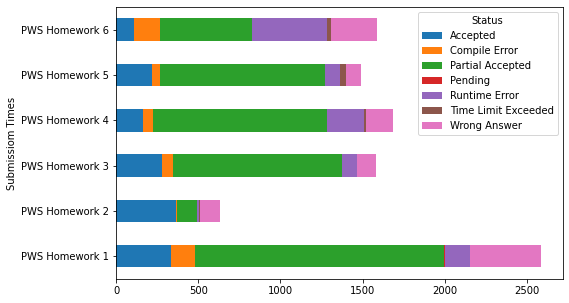

In [19]:
crosstab_HW(df)
plt.show()

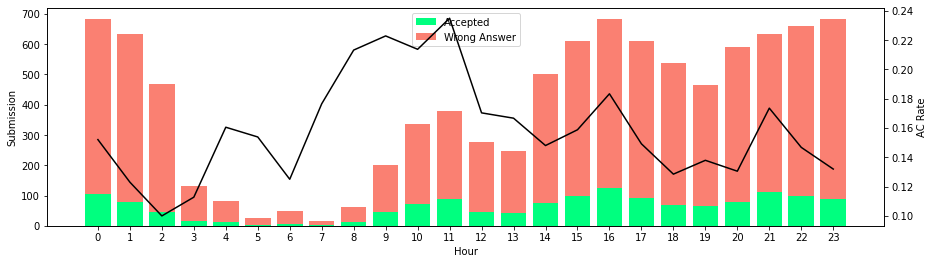

In [20]:
get_time_lineplot(df)
plt.show()

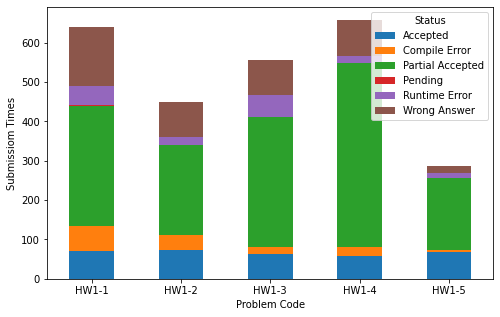

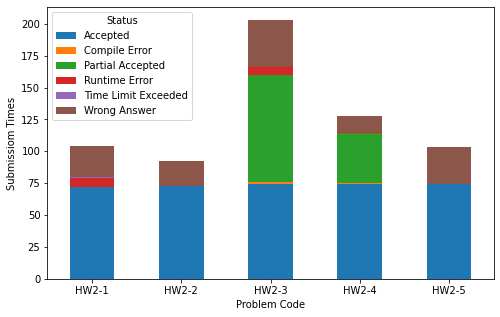

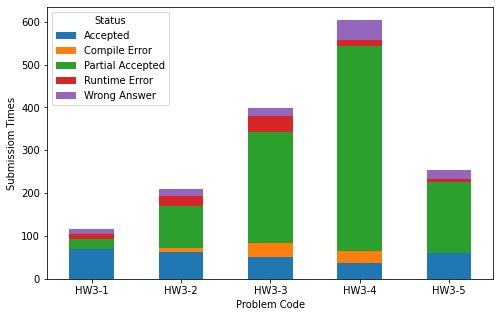

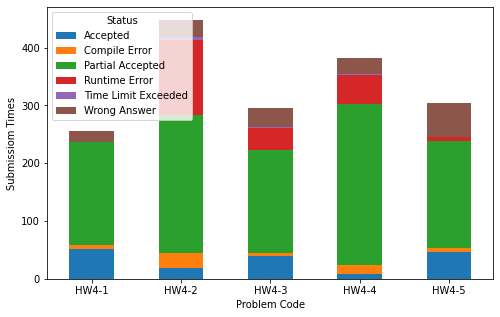

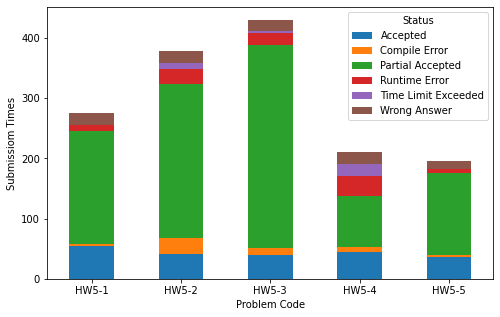

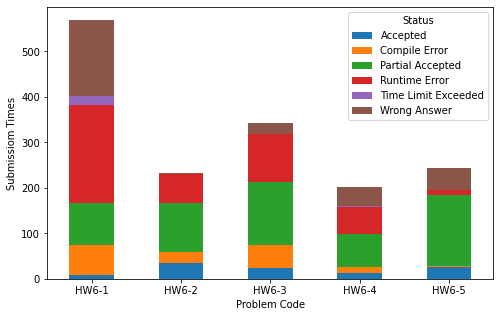

In [21]:
for n in range(1, 7):
  crosstab_Problem(dfs[n])
plt.show()

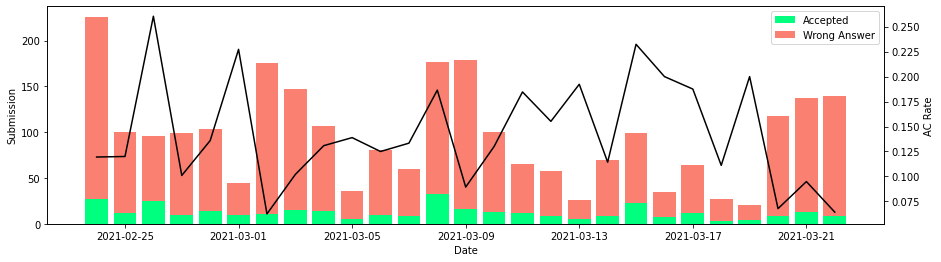

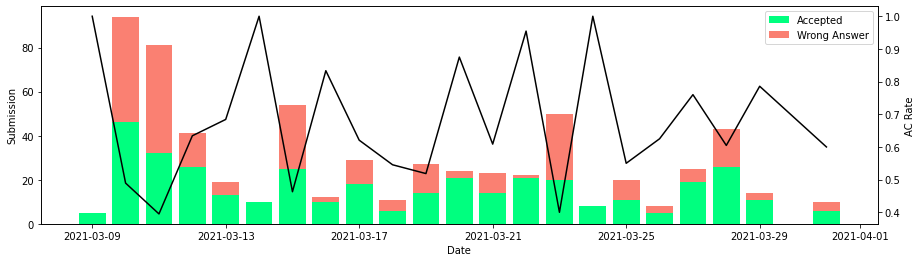

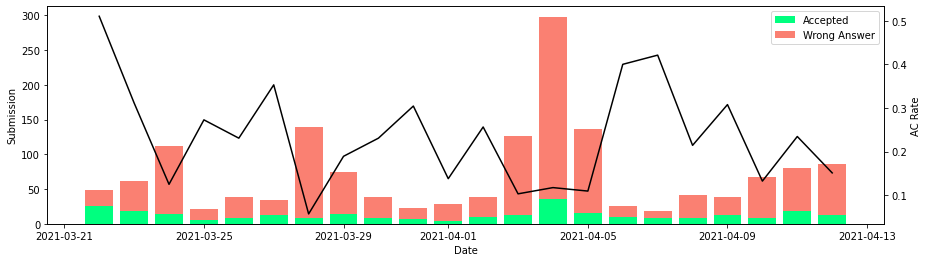

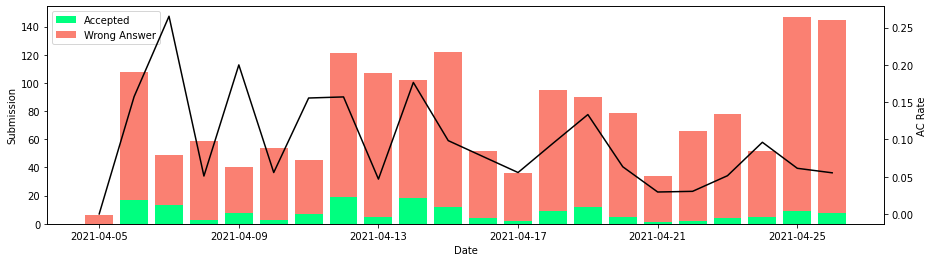

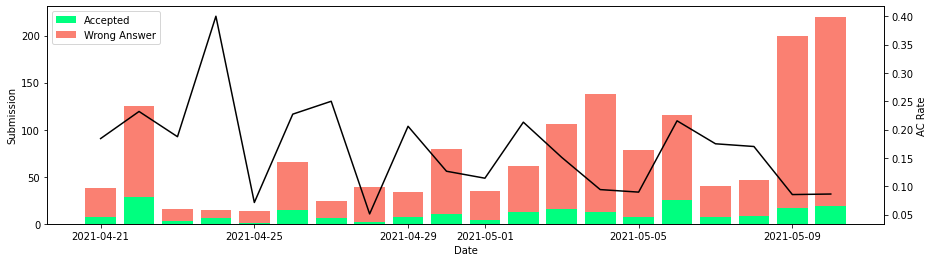

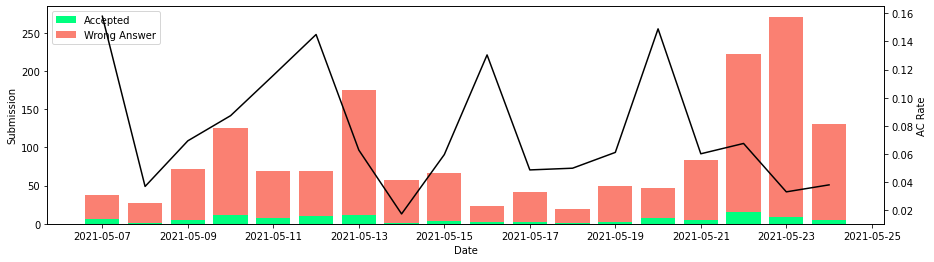

In [22]:
for n in range(1, 7):
  get_time_lineplot(dfs[n], 'date')
plt.show()

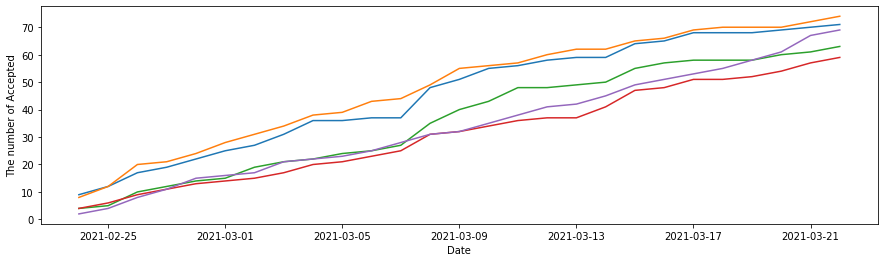

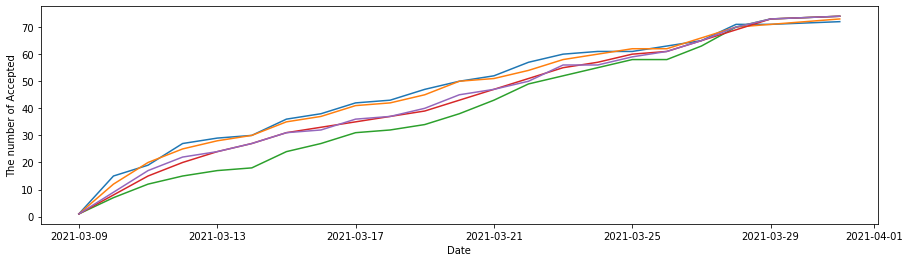

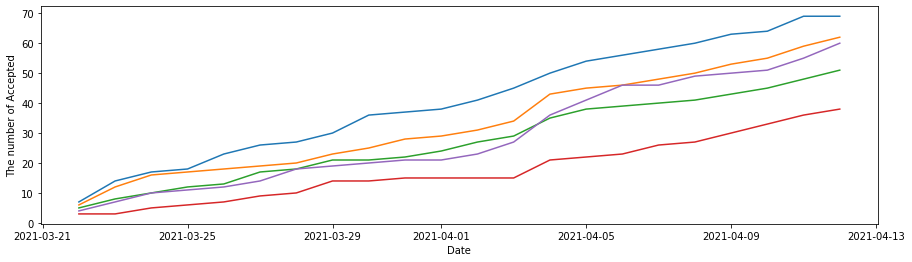

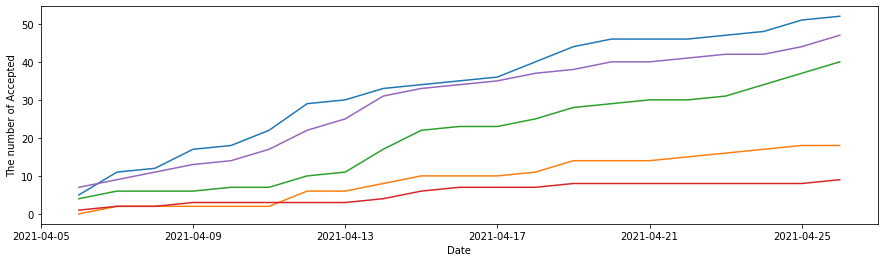

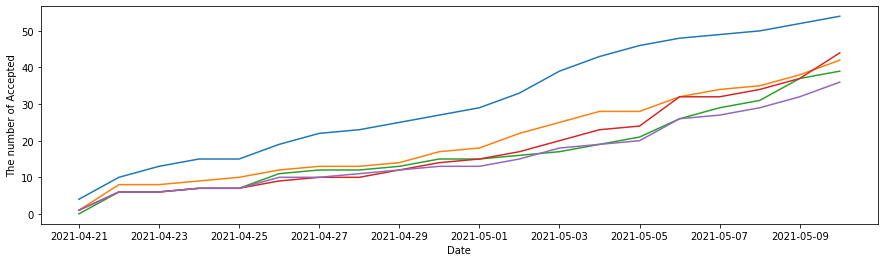

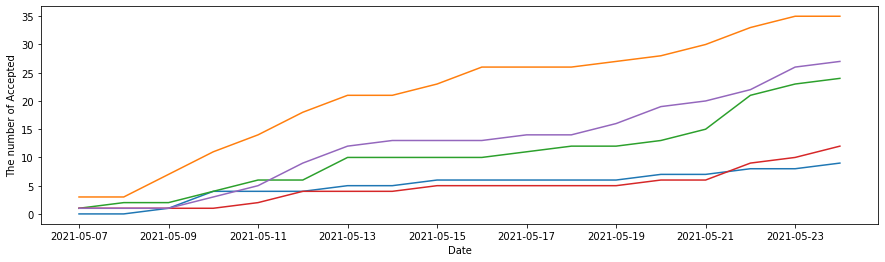

In [23]:
for n in range(1, 7):
  get_ac_plot(n)
plt.show()